<a href="https://colab.research.google.com/github/EZzero7/Analisis_datos_clima/blob/main/Analisis_datos_clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_temp = pd.read_csv("/content/Data/GlobalLandTemperaturesByCountry.csv")

In [ ]:
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
df_temp.shape

(577462, 4)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [ ]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [ ]:
df_t_avg = df_temp.groupby(['Country',
                          pd.Grouper(key='year', freq='1Y')
                          ]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

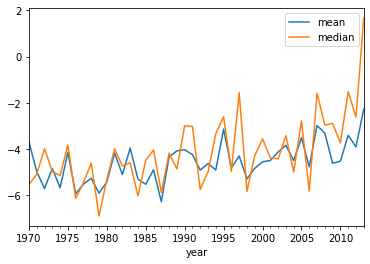

In [ ]:
df_t_avg.xs('Russia')['AverageTemperature'].plot()

In [ ]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [ ]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [ ]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [ ]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


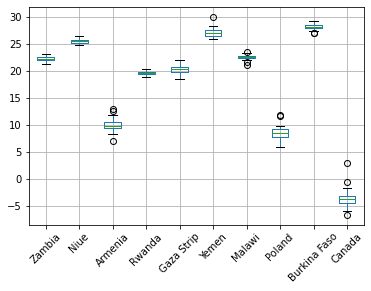

In [ ]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

In [ ]:
df_agri = pd.read_csv('/content/Data/API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv', header=2)
df_fore = pd.read_csv('/content/Data/API_AG.LND.FRST.K2_DS2_en_csv_v2_3751799.csv',header=2)
df_elec = pd.read_csv('/content/Data/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv',header=2)
df_co2e = pd.read_csv('/content/Data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3731329.csv',header=2)
df_popu = pd.read_csv('/content/Data/API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv',header=2)

In [ ]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [ ]:
range(1971,2015)
map(str,range(1971,2015))
cols = ['Country Name', 'Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [ ]:
df_agri.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={
        'variable':'date',
        'Country Name':'Country',
        'Country Code':'name',
        'value':'agriculture'
    }
)

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [ ]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
      columns={'variable' : 'date',
               'Country Name':'Country',
               'Country Code':'name',
               'value':col}
  )

In [ ]:
df_agri

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,5326150.0,5322890.0,5327180.0,5323510.0,5320000.0,...,6459157.2,6477782.4,6497055.3,6505845.2,6515953.0,6521411.4,6532568.3,NaN,NaN,NaN
2,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377000.0,377600.0,378100.0,378730.0,378750.0,...,379100.0,379100.0,379100.0,379100.0,379100.0,379100.0,379190.0,NaN,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,3025335.1,3035850.0,3059019.1,3070610.7,3094681.3,...,3574436.4,3594810.3,3597067.7,3599501.6,3608282.4,3612043.2,3614109.8,NaN,NaN,NaN
4,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,571700.0,572000.0,572200.0,572500.0,572700.0,...,536221.2,541771.9,547322.5,552873.1,558423.8,563974.3,569524.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,233370.0,233480.0,233600.0,233700.0,233800.0,...,235010.0,234990.0,234516.0,234326.0,233858.0,233877.0,233877.0,NaN,NaN,NaN
263,South Africa,ZAF,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,1013350.0,1001350.0,989950.0,977500.0,966100.0,...,963410.0,963410.0,963410.0,963410.0,963410.0,963410.0,963410.0,NaN,NaN,NaN
264,Zambia,ZMB,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,193070.0,193600.0,194040.0,194590.0,195130.0,...,238360.0,237360.0,238360.0,238360.0,238360.0,238360.0,238360.0,NaN,NaN,NaN


In [ ]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e,col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [ ]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.2,1970
1,Afghanistan,1971-12-31,14.9,1971
2,Afghanistan,1972-12-31,13.9,1972
3,Afghanistan,1973-12-31,14.9,1973
4,Afghanistan,1974-12-31,13.6,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.6,2009
10688,Åland,2010-12-31,4.8,2010
10689,Åland,2011-12-31,7.5,2011
10690,Åland,2012-12-31,6.3,2012


In [ ]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11704 non-null  object 
 1   name        11704 non-null  object 
 2   date        11704 non-null  float64
 3   population  11635 non-null  float64
dtypes: float64(2), object(2)
memory usage: 365.9+ KB


In [ ]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_popu, on = ['Country', 'date'], how = 'inner')

In [ ]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9,1971,AFG,11475450.0
1,Afghanistan,13.9,1972,AFG,11791222.0
2,Afghanistan,14.9,1973,AFG,12108963.0
3,Afghanistan,13.6,1974,AFG,12412960.0
4,Afghanistan,13.5,1975,AFG,12689164.0
...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,12526964.0
7220,Zimbabwe,23.3,2010,ZWE,12697728.0
7221,Zimbabwe,22.9,2011,ZWE,12894323.0
7222,Zimbabwe,23.0,2012,ZWE,13115149.0


In [ ]:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country', 'name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country', 'name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country', 'name', 'date'],
                    how = 'inner')

df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9,1971,AFG,11475450.0,1895.8,NaN,380360.0,NaN
1,Afghanistan,13.9,1972,AFG,11791222.0,1532.8,NaN,380460.0,NaN
2,Afghanistan,14.9,1973,AFG,12108963.0,1639.1,NaN,380480.0,NaN
3,Afghanistan,13.6,1974,AFG,12412960.0,1917.8,NaN,380480.0,NaN
4,Afghanistan,13.5,1975,AFG,12689164.0,2126.9,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,12526964.0,7750.0,585.5,163000.0,179513.5
7220,Zimbabwe,23.3,2010,ZWE,12697728.0,9810.0,606.6,162000.0,179052.8
7221,Zimbabwe,22.9,2011,ZWE,12894323.0,11490.0,636.2,164000.0,178592.1
7222,Zimbabwe,23.0,2012,ZWE,13115149.0,12110.0,608.8,162000.0,178131.4


In [ ]:
df_climate = df_merge.dropna()

In [ ]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5979791.3
United States   5470430.0
China           3667540.0
Japan           1173390.0
India            970705.0
                   ...   
Suriname           1500.0
Mozambique         1500.0
Togo               1430.0
Niger               805.0
Eritrea             640.0
Name: co2, Length: 120, dtype: float64

In [ ]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [ ]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index

In [ ]:
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [ ]:
df_max_co2 = df_climate[df_climate['Country'].isin(['United State', 'China', 'Japan','India','Germany','United Kindom','Canada','Italy','Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,27691138.0,419120.0,16167.4,614030.0,3482729.3
1267,Canada,-4.2,1991,CAN,28037420.0,412930.0,16181.6,615332.5,3482258.3
1268,Canada,-5.0,1992,CAN,28371264.0,426000.0,16164.4,614650.0,3481787.4
1269,Canada,-4.0,1993,CAN,28684764.0,422680.0,16320.1,613970.0,3481316.4
1270,Canada,-3.4,1994,CAN,29000663.0,438820.0,16388.3,613290.0,3480845.5
...,...,...,...,...,...,...,...,...,...
4338,Mexico,21.9,2009,MEX,112463886.0,461760.0,1995.3,1033670.0,670871.1
4339,Mexico,21.3,2010,MEX,114092961.0,468940.0,2018.8,1028440.0,669433.1
4340,Mexico,22.6,2011,MEX,115695468.0,480960.0,2216.9,1030730.0,668208.3
4341,Mexico,22.4,2012,MEX,117274156.0,480710.0,2253.5,1021380.0,666983.5


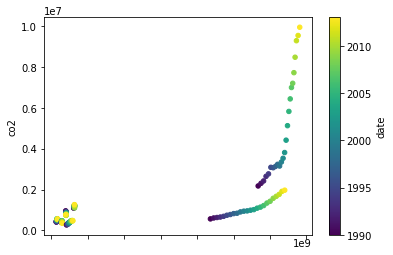

In [ ]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'
)

In [ ]:
df_climate.corr()

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.1,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [ ]:
import seaborn as sns

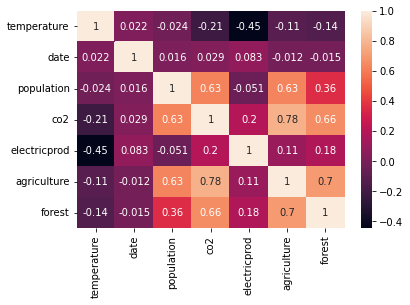

In [ ]:
sns.heatmap(df_climate.corr(), annot = True)

In [ ]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,10230931.0,29250.0,1157.4,91700.0,63710.0
1991,22.4,10346663.5,27345.0,1072.5,91870.0,63349.1
1992,19.9,9748274.5,24085.0,1451.8,89700.0,46809.8
1993,20.6,9877647.0,24080.0,1520.3,83965.0,45837.1
1994,20.5,10014523.5,25515.0,1582.7,85220.0,45468.5
1995,20.0,10081493.5,27300.0,1606.4,77575.0,44901.8
1996,19.9,10110291.0,28315.0,1707.6,78345.0,44265.8
1997,20.2,10113205.0,28945.0,1782.6,79280.0,43629.8
1998,21.2,10116079.5,28965.0,1807.8,80410.0,42993.8


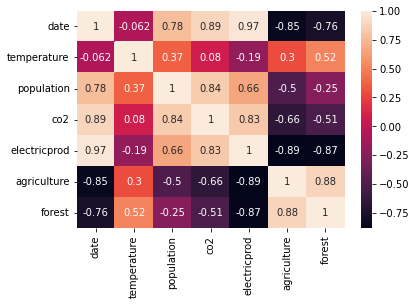

In [ ]:
sns.heatmap(df_med.reset_index().corr(), annot=True)

In [ ]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3a6da11d0>,
      dtype=object)

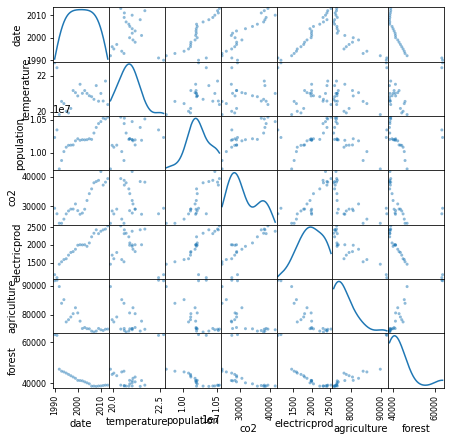

In [ ]:
scatter_matrix(df_med.reset_index(),diagonal = 'kde', figsize = (7,7))

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
                            'Argentina',
                            'Bolivia',
                            'Mexico'
                            'Peru',
                            'Chile'])
][['Country',
   'temperature',
   'co2',
   'agriculture',
   'forest']]

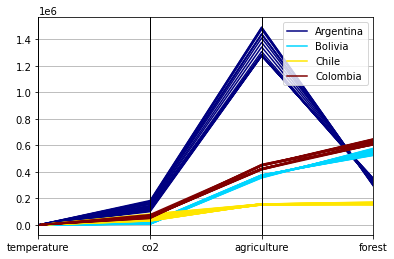

In [ ]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet')